In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("./../DEAP/pollution_data.csv", dtype=object)
df.head()


,Date,City,County,State,Population Staying at Home,Population Not Staying at Home,mil_miles,past_week_avg_miles,latitude,longitude,...,pm10_max,pm10_median,pm10_variance,pm10_count,wind-gust_min,wind-gust_max,wind-gust_median,wind-gust_variance,wind-gust_count,pp_feat
0,2019-01-01,albuquerque,bernalillo,NM,"1,77,171","4,99,456",19.038463500000002,0.0,35.10720930232556,-106.61720930232552,...,127.0,18.0,5303.29,48.0,0.3,27.3,3.8,839.84,54.0,0.319491825499427
1,2019-01-01,atlanta,fulton,GA,"2,83,093","7,63,811",29.295608500000004,0.0,33.760108695652185,-84.40282608695658,...,27.0,14.0,280.83,23.0,0.1,4.5,1.7,12.11,44.0,23.304216398430476
2,2019-01-01,austin,travis,TX,"2,68,732","9,76,194",27.2860795,0.0,30.28333333333335,-97.75064102564095,...,NaN,NaN,NaN,NaN,0.2,14.0,6.8,162.34,67.0,14.333041987312471
3,2019-01-01,baltimore,baltimo,MD,"1,91,486","4,09,167",12.961132000000001,0.0,39.30583333333331,-76.6104166666667,...,15.0,6.0,74.76,24.0,0.1,24.0,8.5,355.46,70.0,6.4032400834450565
4,2019-01-01,boise,ada,ID,"1,05,237","3,63,293",12.6409545,0.0,43.60454545454543,-116.20242424242424,...,20.0,5.0,170.86,47.0,0.1,11.3,2.2,46.19,92.0,0.0


In [3]:
df = df.drop(columns=["Population Staying at Home","Population Not Staying at Home","latitude", "longitude"])
df["Date"] = pd.to_datetime(df["Date"])

In [4]:
df.head()       

,Date,City,County,State,mil_miles,past_week_avg_miles,o3_min,o3_max,o3_median,o3_variance,...,pm10_max,pm10_median,pm10_variance,pm10_count,wind-gust_min,wind-gust_max,wind-gust_median,wind-gust_variance,wind-gust_count,pp_feat
0,2019-01-01,albuquerque,bernalillo,NM,19.038463500000002,0.0,10.4,26.4,20.8,98.44,...,127.0,18.0,5303.29,48.0,0.3,27.3,3.8,839.84,54.0,0.319491825499427
1,2019-01-01,atlanta,fulton,GA,29.295608500000004,0.0,1.6,21.6,8.0,379.32,...,27.0,14.0,280.83,23.0,0.1,4.5,1.7,12.11,44.0,23.304216398430476
2,2019-01-01,austin,travis,TX,27.2860795,0.0,1.6,15.2,11.2,104.74,...,NaN,NaN,NaN,NaN,0.2,14.0,6.8,162.34,67.0,14.333041987312471
3,2019-01-01,baltimore,baltimo,MD,12.961132000000001,0.0,4.0,28.1,19.2,548.92,...,15.0,6.0,74.76,24.0,0.1,24.0,8.5,355.46,70.0,6.4032400834450565
4,2019-01-01,boise,ada,ID,12.6409545,0.0,1.6,28.1,17.4,628.14,...,20.0,5.0,170.86,47.0,0.1,11.3,2.2,46.19,92.0,0.0


In [5]:
df.columns

Index(['Date', 'City', 'County', 'State', 'mil_miles', 'past_week_avg_miles',
       'o3_min', 'o3_max', 'o3_median', 'o3_variance', 'o3_count',
       'pressure_min', 'pressure_max', 'pressure_median', 'pressure_variance',
       'pressure_count', 'pm25_min', 'pm25_max', 'pm25_median',
       'pm25_variance', 'pm25_count', 'humidity_min', 'humidity_max',
       'humidity_median', 'humidity_variance', 'humidity_count',
       'temperature_min', 'temperature_max', 'temperature_median',
       'temperature_variance', 'temperature_count', 'dew_min', 'dew_max',
       'dew_median', 'dew_variance', 'dew_count', 'no2_min', 'no2_max',
       'no2_median', 'no2_variance', 'no2_count', 'wind-speed_min',
       'wind-speed_max', 'wind-speed_median', 'wind-speed_variance',
       'wind-speed_count', 'co_min', 'co_max', 'co_median', 'co_variance',
       'co_count', 'so2_min', 'so2_max', 'so2_median', 'so2_variance',
       'so2_count', 'pm10_min', 'pm10_max', 'pm10_median', 'pm10_variance',
     

In [6]:
def convert_to_float(x) :
    if type(x) == str :
        x = x.replace(" ","")
        x = x.replace(",",".")
    x = float(x)
    return x

In [7]:
def display(City, column, df = df) :
    city_df = df[df["City"] == City]
    
    print(city_df[["Date", column]].head())
    if not pd.api.types.is_datetime64_any_dtype(city_df['Date']):
        city_df['Date'] = pd.to_datetime(city_df['Date'], errors='coerce')
    
    city_df[column] = city_df[column].map(convert_to_float)

    
    plt.figure(figsize=(10, 6))
    plt.plot(city_df['Date'], city_df[column], marker='.', linestyle='-')
    plt.title(f'{column} Concentration Over Time')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()
    
    

          Date             pp_feat
2   2019-01-01  14.333041987312471
56  2019-01-02  14.333041987312471
110 2019-01-03  14.333041987312471
164 2019-01-04  14.333041987312471
218 2019-01-05  14.333041987312471


C:\Users\pierr\AppData\Local\Temp\ipykernel_10616\670082301.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df[column] = city_df[column].map(convert_to_float)


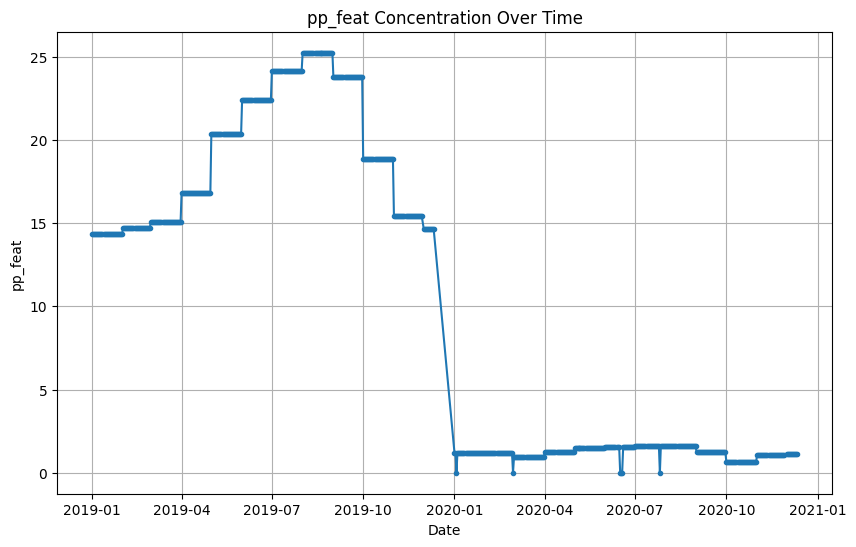

In [8]:
display("austin", 'pp_feat')

In [14]:
austin = df[df["City"] == "austin"].reset_index()

In [16]:
austin.loc[0,  ["City", "County", "State"]]

City      austin
County    travis
State         TX
Name: 0, dtype: object

In [20]:
austin.drop(columns=["City", "County", "State"])

,index,Date,mil_miles,past_week_avg_miles,o3_min,o3_max,o3_median,o3_variance,o3_count,pressure_min,...,pm10_max,pm10_median,pm10_variance,pm10_count,wind-gust_min,wind-gust_max,wind-gust_median,wind-gust_variance,wind-gust_count,pp_feat
0,2,2019-01-01,27.2860795,0.0,1.6,15.2,11.2,104.74,46.0,1013.2,...,NaN,NaN,NaN,NaN,0.2,14.0,6.8,162.34,67.0,14.333041987312471
1,56,2019-01-02,36.321465,0.0,7.3,23.3,16.8,165.61,48.0,979.6,...,NaN,NaN,NaN,NaN,0.1,7.0,1.2,24.45,50.0,14.333041987312471
2,110,2019-01-03,37.8523535,0.0,0.8,12.8,6.4,110.11,45.0,1010.4,...,NaN,NaN,NaN,NaN,0.1,5.5,2.4,24.55,54.0,14.333041987312471
3,164,2019-01-04,44.3767,0.0,13.6,40.8,27.2,493.64,48.0,1017.2,...,NaN,NaN,NaN,NaN,0.2,7.0,1.5,23.63,49.0,14.333041987312471
4,218,2019-01-05,42.2669935,0.0,9.6,22.4,17.6,115.74,48.0,1007.1,...,NaN,NaN,NaN,NaN,0.2,11.5,4.3,113.38,65.0,14.333041987312471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,35336,2020-12-07,26.313971999999996,0.0,3.2,34.4,16.8,980.26,24.0,1008.1,...,NaN,NaN,NaN,NaN,0.4,10.0,4.5,53.14,48.0,1.1097540186555213
662,35389,2020-12-08,32.266736,0.0,4.0,27.2,14.5,620.3,24.0,1006.5,...,NaN,NaN,NaN,NaN,0.3,5.8,3.0,25.15,24.0,1.1097540186555213
663,35442,2020-12-09,31.191902000000002,0.0,0.8,38.4,23.3,1735.03,47.0,1006.7,...,NaN,NaN,NaN,NaN,0.1,2.6,0.6,8.36,19.0,1.1097540186555213
664,35494,2020-12-10,27.908348999999998,0.0,7.3,45.6,25.6,1751.2,47.0,1009.0,...,NaN,NaN,NaN,NaN,0.2,13.0,4.2,97.94,81.0,1.1097540186555213
